In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pybamm as py
import pandas as pd 
from datetime import timedelta
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_excel("C:\\Users\\Harisankar.Suresh\\Documents\\AKASHDEEP\\A1C2C0088854.xlsx",sheet_name='step')

In [3]:
df2=df[df['Step Index']==2]       # getting the charhing data only

In [4]:
df3 = df2.iloc[20:120]            # training data
df3                                 

,Cycle Index,Step Index,Step Number,Step Type,Step Time,Oneset Date,End Date,Capacity(Ah),Spec. Cap.(mAh/g),Chg. Cap.(Ah),...,Chg. Oneset Volt.(V),DChg. Oneset Volt.(V),End Volt.(V),End of Chg.Volt.(V),End of DChg.Volt.(V),Chg. Med. Volt.(V),DChg. Med. Volt.(V),Starting current(A),Termination current(A),DCIR(mΩ)
81,21,2,82,CCCV Chg,02:05:48,2022-08-06 06:05:07,2022-08-06 08:10:54,2.7889,2788911.78,2.7889,...,3.1615,0.0,4.2007,4.2007,0.0,3.8163,0.0,1.4501,0.2090,52.75
85,22,2,86,CCCV Chg,02:06:13,2022-08-06 09:24:33,2022-08-06 11:30:45,2.7816,2781578.89,2.7816,...,3.1715,0.0,4.2004,4.2004,0.0,3.8185,0.0,1.4497,0.2098,53.74
89,23,2,90,CCCV Chg,02:06:37,2022-08-06 12:44:22,2022-08-06 14:50:58,2.7830,2782974.44,2.7830,...,3.1665,0.0,4.2007,4.2007,0.0,3.8222,0.0,1.4505,0.2098,53.02
93,24,2,94,CCCV Chg,02:07:30,2022-08-06 16:04:33,2022-08-06 18:12:02,2.7804,2780357.11,2.7804,...,3.1736,0.0,4.2004,4.2004,0.0,3.8225,0.0,1.4505,0.2098,53.43
97,25,2,98,CCCV Chg,02:05:46,2022-08-06 19:25:41,2022-08-06 21:31:26,2.7904,2790438.44,2.7904,...,3.1594,0.0,4.2010,4.2010,0.0,3.8154,0.0,1.4505,0.2098,52.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,116,2,462,CCCV Chg,02:04:52,2022-08-20 20:48:06,2022-08-20 22:52:57,2.7371,2737062.00,2.7371,...,3.1910,0.0,4.2004,4.2004,0.0,3.8259,0.0,1.4501,0.2094,56.27
465,117,2,466,CCCV Chg,02:04:53,2022-08-21 00:05:37,2022-08-21 02:10:29,2.7380,2737991.33,2.7380,...,3.1891,0.0,4.2004,4.2004,0.0,3.8259,0.0,1.4494,0.2098,56.02
469,118,2,470,CCCV Chg,02:04:53,2022-08-21 03:23:11,2022-08-21 05:28:03,2.7392,2739213.56,2.7392,...,3.1870,0.0,4.2007,4.2007,0.0,3.8250,0.0,1.4501,0.2094,55.86
473,119,2,474,CCCV Chg,02:04:53,2022-08-21 06:40:44,2022-08-21 08:45:36,2.7390,2738955.78,2.7390,...,3.1863,0.0,4.2004,4.2004,0.0,3.8253,0.0,1.4501,0.2098,55.58


In [5]:
df3.columns

Index(['Cycle Index', 'Step Index', 'Step Number', 'Step Type', 'Step Time',
       'Oneset Date', 'End Date', 'Capacity(Ah)', 'Spec. Cap.(mAh/g)',
       'Chg. Cap.(Ah)', 'Chg. Spec. Cap.(mAh/g)', 'DChg. Cap.(Ah)',
       'DChg. Spec. Cap.(mAh/g)', 'Net DChg. Cap.(Ah)', 'Energy(Wh)',
       'Spec. Energy(mWh/g)', 'Chg. Energy(Wh)', 'Chg. Spec. Energy(mWh/g)',
       'DChg. Energy(Wh)', 'DChg. Spec. Energy(mWh/g)', 'Net DChg. Energy(Wh)',
       'Super Capacitor(F)', 'Oneset Volt.(V)', 'Chg. Oneset Volt.(V)',
       'DChg. Oneset Volt.(V)', 'End Volt.(V)', 'End of Chg.Volt.(V)',
       'End of DChg.Volt.(V)', 'Chg. Med. Volt.(V)', 'DChg. Med. Volt.(V)',
       'Starting current(A)', 'Termination current(A)', 'DCIR(mΩ)'],
      dtype='object')

Ploting DCIR value for different cycles.

Text(0, 0.5, 'DCIR (mΩ)')

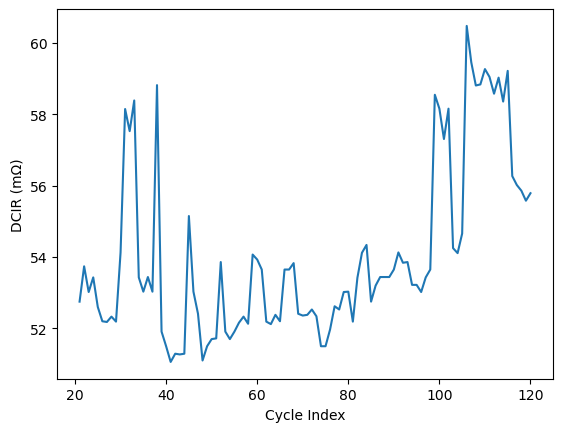

In [6]:
x=df3['Cycle Index']                        
y=df3['DCIR(mΩ)']
plt.plot(x,y)
plt.xlabel('Cycle Index')
plt.ylabel('DCIR (mΩ)')

In [7]:
df4 = pd.DataFrame({'x': x, 'y': y})                        # creating a dataframe df4 containg only dcir and cycle index.
window_size=3                                               # creating window sixe =3
df4['y_ma'] = df4['y'].rolling(window_size).mean()          # we take average of previous 3 values and putting them into another column by the name of 'y_ma'

df4.dropna(inplace=True)
y_ma=df4['y_ma']
x1=df4['x']


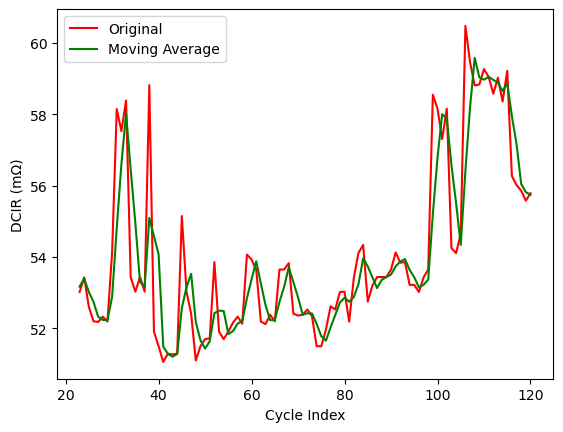

In [10]:
plt.plot(df4.x, df4.y, color = 'red', label = 'Original')               # 'df4.x/df4.y'= all the values in x/y column will be our x axis.
plt.plot(df4.x,df4.y_ma, color = 'green', label = 'Moving Average')
plt.xlabel('Cycle Index')
plt.ylabel('DCIR (mΩ)')
plt.legend()


 Performing polynomial regression of degree n

In [11]:
n = 8
coeff = np.polyfit(x, y, n)         # fitting our curve to some polynomial equation of degree n by looking for n coeffeicent.
coeff                               # Print the equation
poly = np.poly1d(coeff)             # creating a function of ploynomial which will give ploynomial ans.
print(poly)
y_pre=[]                            # creating a list for storing the predicted values.
for i in df4.x:
    
    y_pre.append(poly(i))           # running a loop for putting all those.


           8            7             6             5            4
1.317e-12 x - 7.49e-10 x + 1.782e-07 x - 2.303e-05 x + 0.001758 x
            3         2
 - 0.08049 x + 2.139 x - 29.89 x + 220.6


In [12]:
y_pre

[52.906270739931955,
 53.14535433327626,
 53.39205339354058,
 53.629226833379334,
 53.84396185879277,
 54.02700035966984,
 54.17221340171628,
 54.27612145190116,
 54.337458022670404,
 54.35677447324903,
 54.33608375945465,
 54.278540976536846,
 54.188158592642026,
 54.06955432360465,
 53.92772965284462,
 53.76787705325404,
 53.59521402104522,
 53.4148420846158,
 53.23162900458689,
 53.05011243426375,
 52.87442336284303,
 52.70822771680707,
 52.55468454801908,
 52.416419290137725,
 52.2955106180286,
 52.19348949800545,
 52.11134906974982,
 52.049564053917095,
 52.00811843247749,
 51.986540201951044,
 51.98394205280803,
 51.99906688136306,
 52.03033709359656,
 52.075906713441896,
 52.13371536114039,
 52.20154322039818,
 52.27706616611519,
 52.35791027759822,
 52.44170501526193,
 52.52613439182829,
 52.60898552228534,
 52.68819398977493,
 52.7618855178213,
 52.82841349230816,
 52.88639192977334,
 52.93472354160045,
 52.972622596847174,
 52.99963233956913,
 53.01563676940427,
 53.020866647

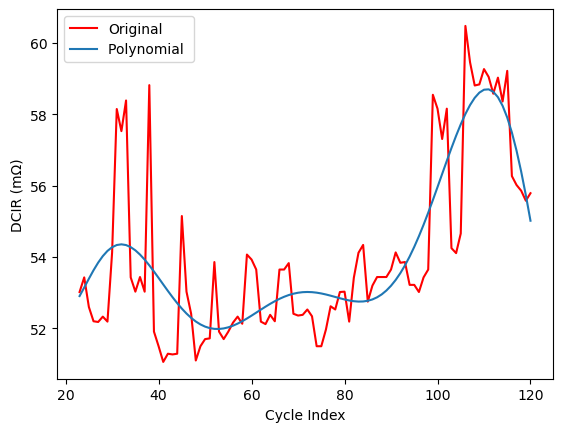

In [13]:
plt.plot(df4.x, df4.y, color = 'red', label = 'Original')

plt.plot(df4.x,y_pre,label='Polynomial ' )
plt.xlabel('Cycle Index')
plt.ylabel('DCIR (mΩ)')
plt.legend()
